**THE SPARK FOUNDATION INTERNSHIP PROGRAM**


**BY ISHRAQUE AHMED**

**TASK-2 PREDICTION USING UNSUPERVISED ML**

**TASK TO PERFORM -- FROM THE GIVEN ‘IRIS’ DATASET, PREDICT THE OPTIMUM NUMBER OF CLUSTERS
AND REPRESENT IT VISUALLY**

**DATA SCIENCE AND BUSINESS ANALYTICS**





<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**LOADING THE DATA SET**


In [2]:
df=pd.read_csv("D:/datasets/iris.csv")

In [3]:
df.head() #getting the top 5 values of the data set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail() #getting the last 5 values

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape #getting the shape of the data set

(150, 6)

**WE CAN SEE THERE ARE 150 ROWS AND 6 COLUMNS IN THE GIVEN DATA SET**

**REMOVING THE "ID" COLUMN AS IT IS OF NO USE TO US"**

In [6]:
df1=df.drop('Id',axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**WE SUCCESSFULLY DROP THE 'ID' COLUMN FROM THE DATA SET**

In [7]:
df1.columns #getting all the 6 column names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df1.count() 

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

**WE CAN SEE ALL THE COLUMNS ARE HAVING 150 VALUES**

In [9]:
df1.isnull().sum() #this gives the null value prediction

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**WE CAN SEE THERE ARE NO NULL VALUES IN THE GIVEN DATA SET**

In [10]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
df1['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

**THIS GIVES THE IDEA THAT EACH TYPE HAS 50 INPUTS**

**NOW VISUALIZING THE DATA THROUGH DIFFERENT GRAPH PLOT**


**USING BAR PLOT TO SEE THE COUNT OF EACH SPECIES**

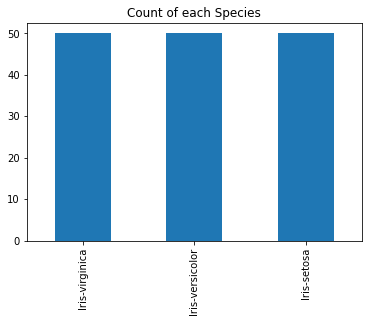

In [13]:
df1["Species"].value_counts().plot.bar()
plt.title("Count of each Species")
plt.show()

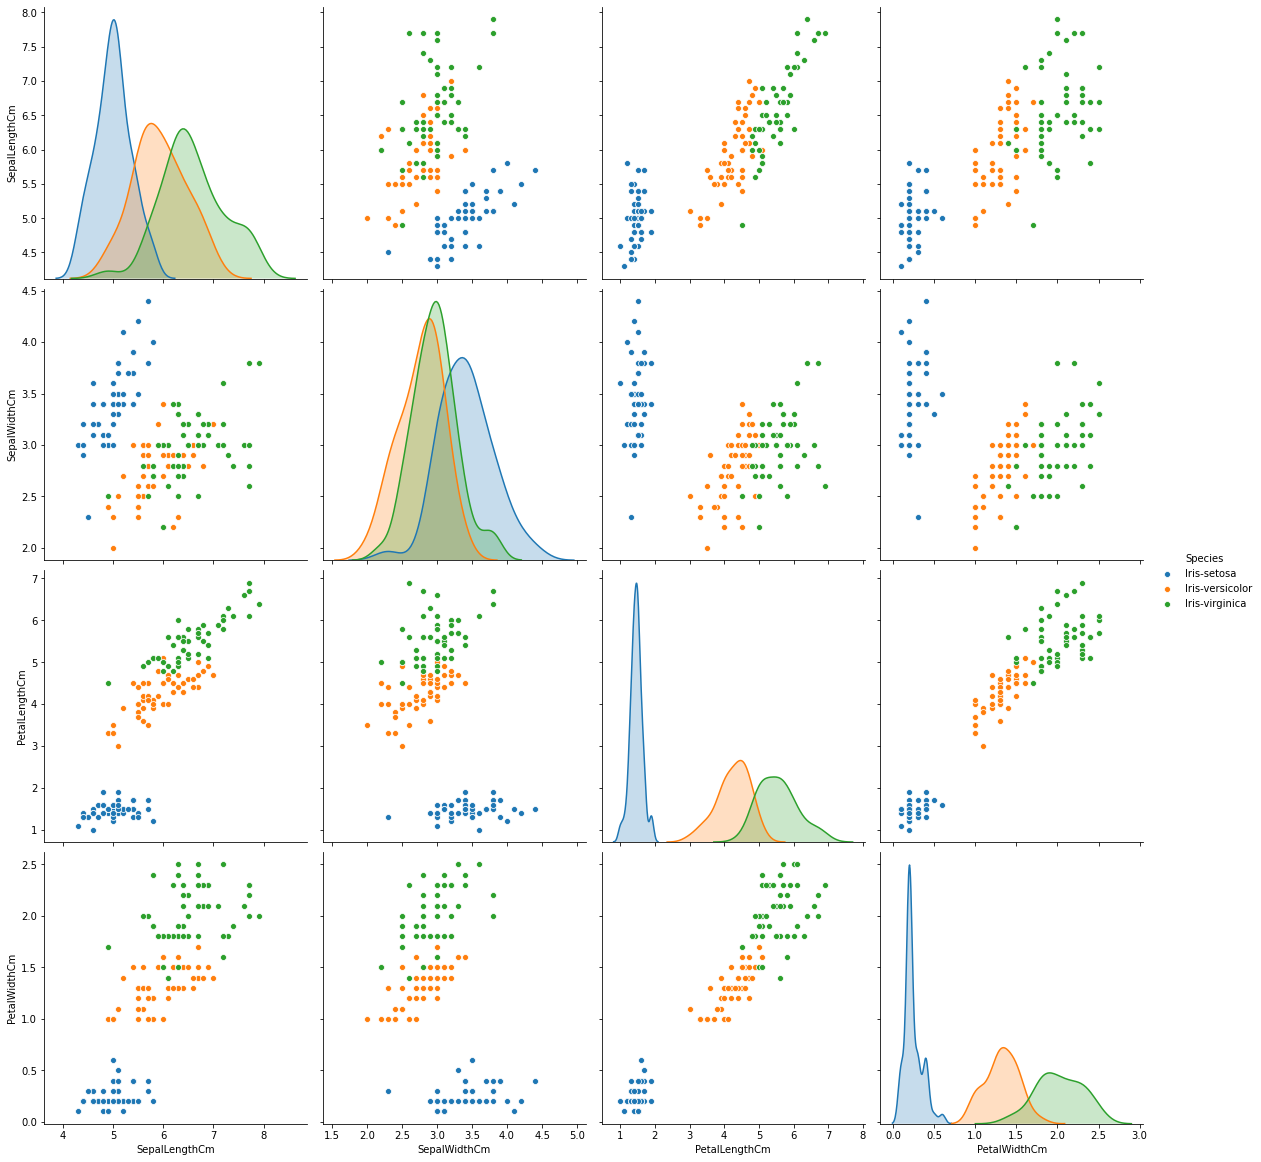

In [14]:
sns.pairplot(data=df1,hue='Species',height=4)
plt.show()

**FROM THE ABOVE PLOT WE CAN SEE THAT THE SETOSA IS EASILY DISTINGUISHABLE WHILE VERGINICA AND VERSICOLOR ARE OVERLAPPING**

**PETAL LENGHT AND PETAL WIDTH ARE THE MOST USEFULL FEATURES**

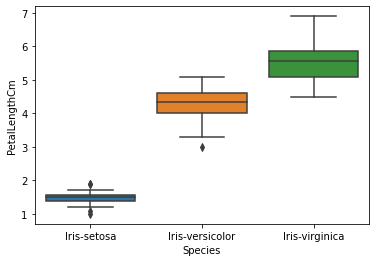

In [15]:
sns.boxplot(x="Species",y="PetalLengthCm",data=df1)


**NOW WE ARE APPLYING K-MEANS ALGORITHM TO FIND THE OPTIMUM NUMBER OF CLUSTERS**

In [16]:
x=df1.iloc[:, :-1].values

**THE ELBOW METHOD**

In [17]:
from sklearn.cluster import KMeans
#to get the value we need to experiment with some k values
wcv=[] #within cluster variation which helps to find the optimum number of cluster

for i in range(1,16):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcv.append(km.inertia_) #to calculate wcv
    
    

**VISUALIZING THROIGH PLOT**

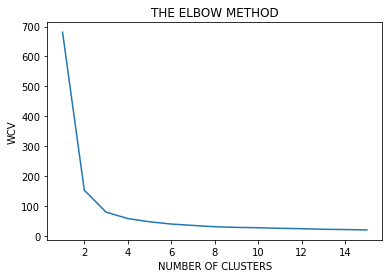

In [18]:
plt.plot(range(1,16),wcv)
plt.title("THE ELBOW METHOD")
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel("WCV")
plt.show()

**FROM THE ABOVE PLOT**
**WE CAN SEE THE OPTIMUM NUMBER OF CLUSTERS TO BE 3**

In [19]:
print(wcv)

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.93873974358975, 34.32042673992674, 29.961863114955225, 27.76690692640694, 26.601150700563643, 24.62997721396251, 23.413480158730163, 21.473765010351972, 20.56058313581843, 19.307088744588746]


**APPLYING K-MEANS CLUSTERING ON THE DATA**

In [22]:
#fitting k-means to the dataset

kmeans=KMeans(n_clusters=5, random_state=10)
Y_pred= kmeans.fit_predict(x)

In [23]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 4, 0, 2, 4, 4, 2, 3, 2, 4, 2,
       4, 4, 4, 0, 4, 4, 4, 2, 2, 0, 4, 0, 2, 0, 4, 2, 0, 0, 4, 2, 2, 2,
       4, 0, 0, 2, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0])

In [24]:
kmeans.n_iter_

4

In [26]:
#adding the predicted column
df["Predicted"]=Y_pred
df.head() #checking the added column

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [28]:
df.Predicted=df.Predicted.map({0:'Iris-Setosa',1:'Iris-Versicolor',2:'Iris-Verginica'})
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-Versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-Versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-Versicolor
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-Versicolor
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-Versicolor


**NOW VISUALIZING THE CLUSTER**

**Sepal length vs Sepal width**

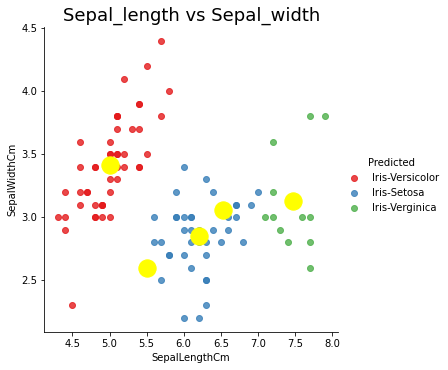

In [35]:
sns.lmplot(data=df,x="SepalLengthCm",y="SepalWidthCm",fit_reg=False,hue="Predicted",palette="Set1")
 #no regression line
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s=300,c='yellow')
plt.title('Sepal_length vs Sepal_width',size=18)
plt.show()
#plotting the Centroid

**Petal length vs Petal width**

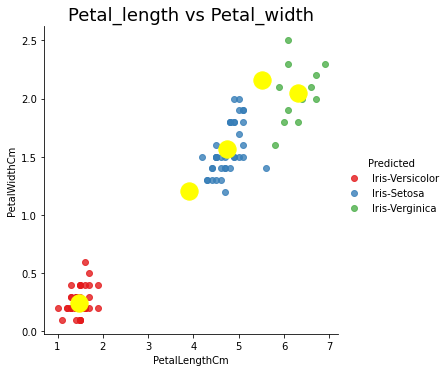

In [40]:
sns.lmplot(data=df,x="PetalLengthCm",y="PetalWidthCm",fit_reg=False,hue="Predicted",palette="Set1")
 #no regression line
plt.scatter(kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:, 3],s=300,c='yellow')
plt.title('Petal_length vs Petal_width',size=18)
plt.show()

**CONCLUSION**

So predicted the optimum number of clusters i.e 3 and also visualize it with different plots

**TASK-2 COMPLETE**

**BY ISHRAQUE AHMED**